NJ Transit + Amtrak (NEC) Rail Performance

Research Topic:

The analysis is aimed to cluster train delay data from NJ Transit to uncover patterns and insights related to delays. Unsupervised learning techniques, including K-means clustering with PCA and Gaussian Mixture Model (GMM) clustering with t-SNE, were employed to segment the data into distinct clusters. The analysis also investigated which clusters exhibited the most significant delays on Fridays and during rush hours on weekdays.

The data set used is NJ Transit + Amtrak (NEC) Rail Performance
Link: https://www.kaggle.com/datasets/pranavbadami/nj-transit-amtrak-nec-performance/data

The dataset has about 27 date files. The data set under consideration is 2020 May dataset. The data has 98698 records and 13 columns.

In [61]:
#imports

import os
import pandas as pd
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD

# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.mixture import GaussianMixture
# from sklearn.metrics import silhouette_score

In [62]:
# data_folder_path = '/content/drive/MyDrive/Data Science/archive-2'

# dfs=[]

# file_path=glob.glob(os.path.join(data_folder_path, '2020_*.csv'))

# for filename in file_path:
#   # Read the CSV file and append it to the list
#       df = pd.read_csv(filename)
#       dfs.append(df)

# # Concatenate all DataFrames into a single DataFrame
# data = pd.concat(dfs, ignore_index=True)

data=pd.read_csv('/content/drive/MyDrive/Data Science/archive-2/2020_05.csv')


In [63]:
data.count()

date              98698
train_id          98698
stop_sequence     87172
from              98698
from_id           98698
to                98698
to_id             98698
scheduled_time    87172
actual_time       98698
delay_minutes     87172
status            98698
line              98698
type              98698
dtype: int64

In [64]:
data.shape

(98698, 13)

In [65]:
data.describe()

,stop_sequence,from_id,to_id,delay_minutes
count,87172.000000,98698.000000,98698.000000,87172.000000
mean,8.046907,4118.725688,4132.612606,3.281289
std,4.984259,11702.316235,11720.132745,10.253101
min,1.000000,1.000000,1.000000,0.000000
25%,4.000000,49.000000,49.000000,0.116667
50%,8.000000,102.000000,102.000000,1.200000
75%,11.000000,132.000000,132.000000,3.083333
max,26.000000,43599.000000,43599.000000,182.000000


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98698 entries, 0 to 98697
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            98698 non-null  object 
 1   train_id        98698 non-null  object 
 2   stop_sequence   87172 non-null  float64
 3   from            98698 non-null  object 
 4   from_id         98698 non-null  int64  
 5   to              98698 non-null  object 
 6   to_id           98698 non-null  int64  
 7   scheduled_time  87172 non-null  object 
 8   actual_time     98698 non-null  object 
 9   delay_minutes   87172 non-null  float64
 10  status          98698 non-null  object 
 11  line            98698 non-null  object 
 12  type            98698 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.8+ MB


In [67]:
data.head(5)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2020-05-01,5543,1.0,Newark Penn Station,107,Newark Penn Station,107,2020-05-01 23:38:00,2020-05-01 23:40:09,2.150000,departed,Raritan Valley,NJ Transit
1,2020-05-01,5543,2.0,Newark Penn Station,107,Union,38105,2020-05-01 23:47:00,2020-05-01 23:47:01,0.016667,departed,Raritan Valley,NJ Transit
2,2020-05-01,5543,3.0,Union,38105,Roselle Park,31,2020-05-01 23:50:00,2020-05-01 23:51:04,1.066667,departed,Raritan Valley,NJ Transit
3,2020-05-01,5543,4.0,Roselle Park,31,Cranford,32,2020-05-01 23:55:00,2020-05-01 23:55:31,0.516667,departed,Raritan Valley,NJ Transit
4,2020-05-01,5543,5.0,Cranford,32,Westfield,155,2020-05-01 23:59:00,2020-05-01 23:59:01,0.016667,departed,Raritan Valley,NJ Transit


In [68]:
data.columns

Index(['date', 'train_id', 'stop_sequence', 'from', 'from_id', 'to', 'to_id',
       'scheduled_time', 'actual_time', 'delay_minutes', 'status', 'line',
       'type'],
      dtype='object')

In [69]:
data.dtypes

date               object
train_id           object
stop_sequence     float64
from               object
from_id             int64
to                 object
to_id               int64
scheduled_time     object
actual_time        object
delay_minutes     float64
status             object
line               object
type               object
dtype: object

In [70]:
print(data.isnull().sum())

date                  0
train_id              0
stop_sequence     11526
from                  0
from_id               0
to                    0
to_id                 0
scheduled_time    11526
actual_time           0
delay_minutes     11526
status                0
line                  0
type                  0
dtype: int64


# Data Cleaning

In [71]:
#Changing date colummns to dates

data['scheduled_time'] = pd.to_datetime(data['scheduled_time'])
data['actual_time'] = pd.to_datetime(data['actual_time'])

# Extract day of the week from 'actual_time'
data['day_of_week'] = data['actual_time'].dt.dayofweek

# Extract hour of the day from 'actual_time'
data['hour_of_day'] = data['actual_time'].dt.hour

# data['date'] = pd.to_datetime(data['date'], format='ISO8601', errors='coerce')
# data['scheduled_time'] = pd.to_datetime(data['scheduled_time'], format='%H:%M:%S', errors='coerce').dt.time
# data['actual_time'] = pd.to_datetime(data['actual_time'], format='%H:%M:%S', errors='coerce').dt.time


In [72]:
data.dtypes

date                      object
train_id                  object
stop_sequence            float64
from                      object
from_id                    int64
to                        object
to_id                      int64
scheduled_time    datetime64[ns]
actual_time       datetime64[ns]
delay_minutes            float64
status                    object
line                      object
type                      object
day_of_week                int32
hour_of_day                int32
dtype: object

In [73]:
data.dropna(how='all', inplace=True)

In [74]:
data.shape

(98698, 15)

In [75]:
data.dropna(inplace=True)
data.shape

(87172, 15)

# **Feature Selection:**


**Day of the week:** This feature captures potential patterns in train delays based on weekdays.

**Hour of the day:** This feature helps identify rush hours and their impact on train delays.

**Route information:**'from', 'to', and 'line' columns provide insights into different train routes and their associated delays.

**Delay information:**'delay_minutes' column indicates the duration of delays, which is crucial for clustering.




In [76]:
data.columns

Index(['date', 'train_id', 'stop_sequence', 'from', 'from_id', 'to', 'to_id',
       'scheduled_time', 'actual_time', 'delay_minutes', 'status', 'line',
       'type', 'day_of_week', 'hour_of_day'],
      dtype='object')

In [77]:
# Dropping unnecessary columns
data.drop(['stop_sequence', 'from_id', 'to_id', 'type'], axis=1, inplace=True)
data.dtypes

date                      object
train_id                  object
from                      object
to                        object
scheduled_time    datetime64[ns]
actual_time       datetime64[ns]
delay_minutes            float64
status                    object
line                      object
day_of_week                int32
hour_of_day                int32
dtype: object

In [78]:
selected_features = ['day_of_week', 'hour_of_day', 'from', 'to', 'line', 'delay_minutes']
selected_data = data[selected_features]
selected_data.columns

selected_data['day_of_week']=selected_data['day_of_week'].astype(int)

selected_data['hour_of_day']=selected_data['hour_of_day'].astype(int)

<ipython-input-78-4a953d0ce718>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['day_of_week']=selected_data['day_of_week'].astype(int)
<ipython-input-78-4a953d0ce718>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['hour_of_day']=selected_data['hour_of_day'].astype(int)


In [79]:
data.head()

,date,train_id,from,to,scheduled_time,actual_time,delay_minutes,status,line,day_of_week,hour_of_day
0,2020-05-01,5543,Newark Penn Station,Newark Penn Station,2020-05-01 23:38:00,2020-05-01 23:40:09,2.150000,departed,Raritan Valley,4,23
1,2020-05-01,5543,Newark Penn Station,Union,2020-05-01 23:47:00,2020-05-01 23:47:01,0.016667,departed,Raritan Valley,4,23
2,2020-05-01,5543,Union,Roselle Park,2020-05-01 23:50:00,2020-05-01 23:51:04,1.066667,departed,Raritan Valley,4,23
3,2020-05-01,5543,Roselle Park,Cranford,2020-05-01 23:55:00,2020-05-01 23:55:31,0.516667,departed,Raritan Valley,4,23
4,2020-05-01,5543,Cranford,Westfield,2020-05-01 23:59:00,2020-05-01 23:59:01,0.016667,departed,Raritan Valley,4,23


In [80]:
selected_data.dtypes

day_of_week        int64
hour_of_day        int64
from              object
to                object
line              object
delay_minutes    float64
dtype: object

In [81]:
selected_data.head()

,day_of_week,hour_of_day,from,to,line,delay_minutes
0,4,23,Newark Penn Station,Newark Penn Station,Raritan Valley,2.150000
1,4,23,Newark Penn Station,Union,Raritan Valley,0.016667
2,4,23,Union,Roselle Park,Raritan Valley,1.066667
3,4,23,Roselle Park,Cranford,Raritan Valley,0.516667
4,4,23,Cranford,Westfield,Raritan Valley,0.016667


In [82]:
# Define preprocessing steps for numerical and categorical features

numeric_features = ['delay_minutes']
categorical_features = ['day_of_week', 'hour_of_day', 'from', 'to', 'line']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Unsupervised Learning: K-Means with PCA

In [83]:
pca_kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])


In [84]:
# Drop categorical columns from selected_data
selected_data_numeric = selected_data.drop(columns=categorical_features)

# Handle missing values if necessary
# selected_data_numeric = selected_data_numeric.dropna()

# Check the number of features in your dataset
num_features = selected_data_numeric.shape[1]

# Define preprocessing steps for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_data_numeric.columns)
    ])

# Apply preprocessing to numerical features
selected_data_scaled = preprocessor.fit_transform(selected_data_numeric)

# Apply PCA if you have more than one feature
if num_features > 1:
    pca = PCA(n_components=min(num_features, 2))  # Reduce to the minimum of 2 or the number of features
    selected_data_pca = pca.fit_transform(selected_data_scaled)
else:
    selected_data_pca = selected_data_scaled  # No need for PCA if only one feature

# Define KMeans pipeline
kmeans_pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

silhouette_scores={}
# Fit KMeans pipeline and calculate silhouette scores
for k in range(4, 11):  # Trying K values from 4 to 10
    kmeans_pipeline.set_params(kmeans__n_clusters=k)
    kmeans_pipeline.fit(selected_data_pca)
    cluster_labels = kmeans_pipeline.named_steps['kmeans'].labels_
    silhouette_avg = silhouette_score(selected_data_pca, cluster_labels)
    silhouette_scores[k]=silhouette_avg
    print(f"Silhouette Score for K={k}: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=4: 0.8113041273614281


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=5: 0.721105675150763


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=6: 0.6467036583740763


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=7: 0.6467622237820283


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=8: 0.6530488105027259


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=9: 0.6557412268450769


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=10: 0.6569624987513802


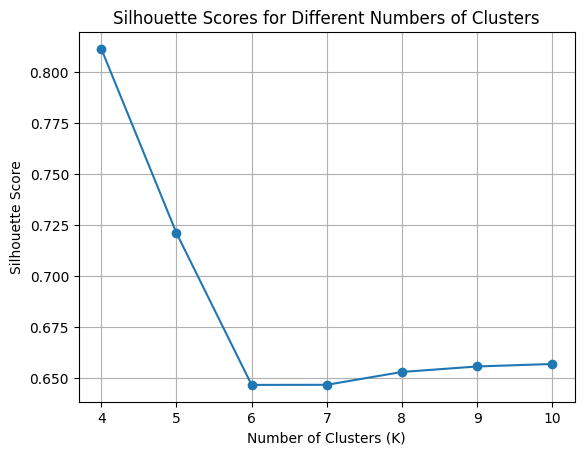

In [85]:
# Extract K values and silhouette scores
k_values = list(silhouette_scores.keys())
silhouette_avg_values = list(silhouette_scores.values())


# Visualize silhouette scores
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [86]:
# Add cluster labels to the original dataframe
selected_data['cluster'] = cluster_labels

<ipython-input-86-a1298fb31efb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['cluster'] = cluster_labels


In [87]:
# Analyze cluster delays
friday_cluster_delay = selected_data[selected_data['day_of_week'] == 4].groupby('cluster')['delay_minutes'].sum()
print("Cluster train delay on Friday:\n", friday_cluster_delay)

weekday_rush_hour_clusters = selected_data[(selected_data['day_of_week'] < 5) & (selected_data['hour_of_day'].isin([7, 8, 17, 18]))]
rush_hour_cluster_delay = weekday_rush_hour_clusters.groupby('cluster')['delay_minutes'].sum()
print("Cluster train delays for rush hour on weekday:\n", rush_hour_cluster_delay)


Cluster train delay on Friday:
 cluster
0     3879.683333
2     5474.550000
3     5326.316667
4     7881.133333
5    14757.233333
6     4204.066667
7     2043.733333
8     4648.183333
9     4002.083333
Name: delay_minutes, dtype: float64
Cluster train delays for rush hour on weekday:
 cluster
0     4137.183333
2     5101.666667
3      545.000000
4    10958.216667
5    17450.200000
6    15133.866667
7      964.766667
8     5613.666667
9     4804.016667
Name: delay_minutes, dtype: float64


Text(0, 0.5, 'Total Delay (minutes)')

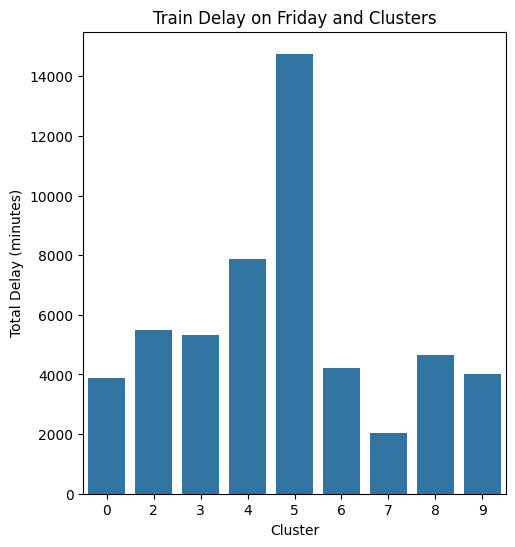

In [88]:
# Visualize cluster delays
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=friday_cluster_delay.index, y=friday_cluster_delay.values)
plt.title("Train Delay on Friday and Clusters")
plt.xlabel("Cluster")
plt.ylabel("Total Delay (minutes)")

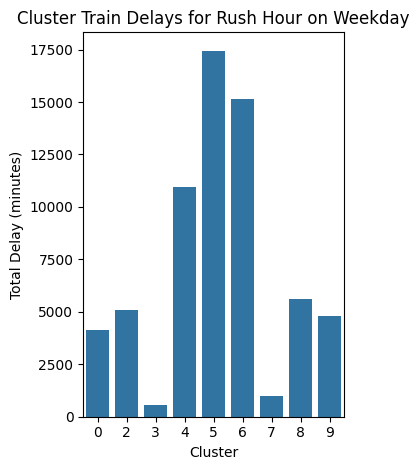

In [89]:
plt.subplot(1, 2, 2)
sns.barplot(x=rush_hour_cluster_delay.index, y=rush_hour_cluster_delay.values)
plt.title("Cluster Train Delays for Rush Hour on Weekday")
plt.xlabel("Cluster")
plt.ylabel("Total Delay (minutes)")

plt.tight_layout()
plt.show()

# T-SNE and GMM




Silhouette Score for K=4: 0.5138237971729359
Silhouette Score for K=5: 0.5681100390330704
Silhouette Score for K=6: 0.5687098269149007
Silhouette Score for K=7: 0.5737100910944891
Silhouette Score for K=8: 0.5761075273880479
Silhouette Score for K=9: 0.576131851695881
Silhouette Score for K=10: 0.6468683565053005


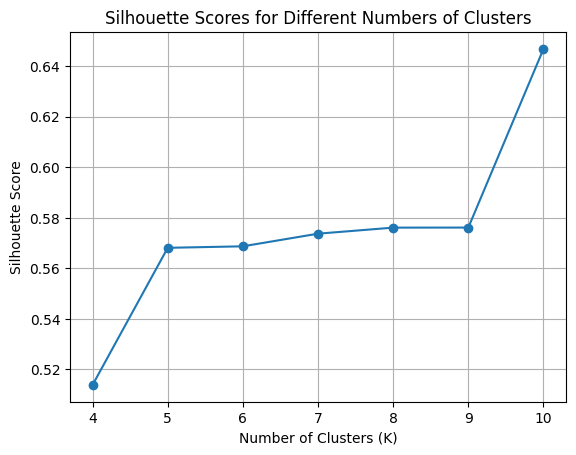

In [106]:
# Define range of K values
k_values = range(4, 11)  # Range of K values from 4 to 10

# Dictionary to store silhouette scores for each K value
silhouette_scores = {}

# Define preprocessing steps for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_data_numeric.columns)
    ])

# Apply preprocessing to numerical features
selected_data_scaled = preprocessor.fit_transform(selected_data_numeric)
selected_data_scaled_df = pd.DataFrame(selected_data_scaled, columns=selected_data_numeric.columns)

# Iterate over different values of K
for k in k_values:
    # Define GMM pipeline for current K value
    gmm_pipeline = Pipeline([
        ('gmm', GaussianMixture(n_components=k, random_state=42))
    ])

    # Fit pipeline
    gmm_pipeline.fit(selected_data_scaled_df)

    # Get cluster labels
    cluster_labels = gmm_pipeline.named_steps['gmm'].predict(selected_data_scaled_df)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(selected_data_scaled_df, cluster_labels)
    silhouette_scores[k] = silhouette_avg

    print(f"Silhouette Score for K={k}: {silhouette_avg}")

# Visualize silhouette scores
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [112]:
selected_data.head()

,day_of_week,hour_of_day,from,to,line,delay_minutes,cluster
0,4,23,Newark Penn Station,Newark Penn Station,Raritan Valley,2.150000,5
1,4,23,Newark Penn Station,Union,Raritan Valley,0.016667,0
2,4,23,Union,Roselle Park,Raritan Valley,1.066667,0
3,4,23,Roselle Park,Cranford,Raritan Valley,0.516667,0
4,4,23,Cranford,Westfield,Raritan Valley,0.016667,0


In [127]:
# Combine cluster labels with the original data
selected_data_with_clusters = pd.concat([selected_data, pd.Series(cluster_labels, name='cluster_labels')], axis=1)
selected_data_with_clusters['cluster_labels'].fillna(1, inplace=True)
selected_data_with_clusters['cluster_labels'] = selected_data_with_clusters['cluster_labels'].astype(int)
# Calculate average delay for each cluster
average_delay_by_cluster = selected_data_with_clusters.groupby('cluster_labels')['delay_minutes'].mean()

# most train delay cluster for friday
friday_cluster = selected_data_with_clusters[selected_data_with_clusters['day_of_week'] == 4].groupby('cluster_labels')['delay_minutes'].sum()

# Which cluster contains the most train delays for the rush hour in the weekday?
rush_hour_cluster = selected_data_with_clusters[(selected_data_with_clusters['day_of_week'] != 5) & (selected_data_with_clusters['day_of_week'] != 6) & (selected_data_with_clusters['hour_of_day'] >= 7) & (selected_data_with_clusters['hour_of_day'] <= 9)].groupby('cluster_labels')['delay_minutes'].sum()

print("Cluster with the most train delay on Friday:", friday_cluster)
print("Cluster with the most train delays for rush hour in the weekday:", rush_hour_cluster)



Cluster with the most train delay on Friday: cluster_labels
0     2464.116667
1    29105.716667
2       25.816667
3      135.933333
4     4736.383333
5       69.933333
6      210.250000
7      385.866667
8      357.766667
9    14725.200000
Name: delay_minutes, dtype: float64
Cluster with the most train delays for rush hour in the weekday: cluster_labels
0      604.016667
1    13372.183333
2       98.783333
3       39.366667
4     3075.466667
5      101.466667
6      137.616667
7       27.600000
8      211.750000
9     6694.316667
Name: delay_minutes, dtype: float64


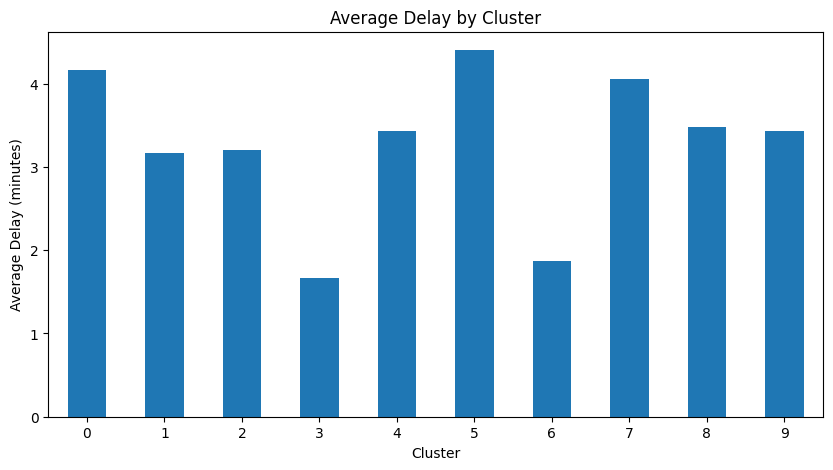

In [128]:
# Visualize average delay for each cluster
plt.figure(figsize=(10, 5))
average_delay_by_cluster.plot(kind='bar')
plt.title('Average Delay by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=0)
plt.show()




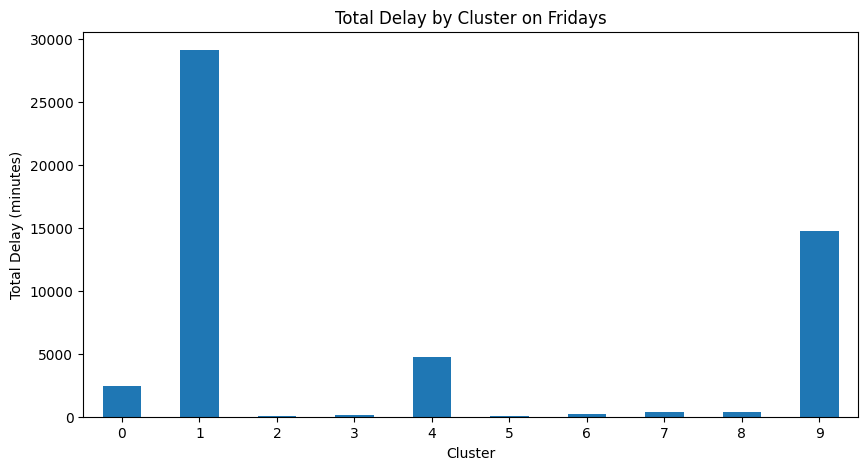

In [129]:
# Visualize total delay for each cluster on Fridays
plt.figure(figsize=(10, 5))
friday_cluster.plot(kind='bar')
plt.title('Total Delay by Cluster on Fridays')
plt.xlabel('Cluster')
plt.ylabel('Total Delay (minutes)')
plt.xticks(rotation=0)
plt.show()



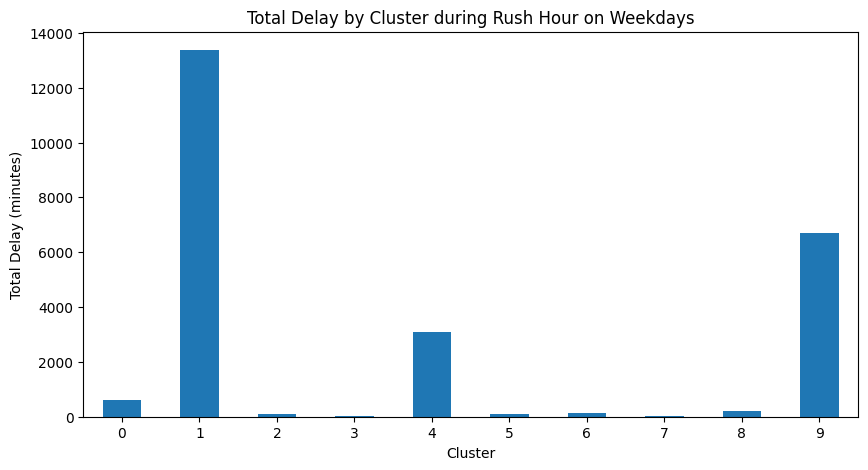

In [130]:
# Visualize total delay for each cluster during rush hour on weekdays
plt.figure(figsize=(10, 5))
rush_hour_cluster.plot(kind='bar')
plt.title('Total Delay by Cluster during Rush Hour on Weekdays')
plt.xlabel('Cluster')
plt.ylabel('Total Delay (minutes)')
plt.xticks(rotation=0)
plt.show()

# Inference and Conclusion:

Silhouette scores were computed for k values ranging from 4 to 10. The optimal number of clusters was determined based on the hightest silhoutte scores.

**For K-means with PCA:**

The application of PCA (Principal Component Analysis) in conjunction with K-means clustering on NJ Transit train delay data has provided valuable insights into the underlying structure and patterns within the dataset.

The silhouette scores for different values of K (number of clusters) ranged from approximately 0.646 to 0.812. These scores indicate a high degree of separation between clusters, suggesting that the chosen features adequately capture the variability in the data.

Further analysis identified clusters with the highest delays on Fridays and during rush hours on weekdays.

**GMM Clustering with t-SNE:**

The t-SNE algorithm was utilized to visualize the data in two dimensions, preserving local structures and relationships.
GMM clustering was applied to the reduced-dimensional data to identify clusters based on train delay patterns.
Silhouette scores were computed to determine the optimal number of clusters, ensuring meaningful segmentation of the data.

The silhouette scores for different values of K (number of clusters) ranged from approximately 0.5138 to 0.6468. The silhouette scores steadily increased as the number of clusters increased, reaching a peak of approximately 0.646 for K=10.

The analysis of train delay data using unsupervised learning techniques yielded valuable insights into delay patterns and segmentation of the data into meaningful clusters. By identifying clusters with the highest delays on specific days and times, NJ Transit can implement targeted strategies to improve service reliability and customer satisfaction.